# Polynomial Regression and Regularization

### Loading Data

In [2]:
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

In [3]:
from sklearn.datasets import load_boston


In [4]:
boston = load_boston()
X, y = boston['data'], boston['target']

In [5]:
# print(boston.DESCR)

### Lasso Regression
* L1 regularization

$J_\theta(X) = \frac{1}{2}\sum_{i=1}^m (y - w^Tx_i)^2 + \alpha \sum_{i=1}^d |w_i|$ 

$y = w^T$

* Alpha is a hyperparameter

In [6]:
lasso = Lasso(alpha = .1)
lasso.fit(X, y )
lasso.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

> Here nitric oxide concentration was zero.

In [7]:
lasso = Lasso(alpha = 10)
lasso.fit(X, y )
lasso.coef_

array([-0.        ,  0.02614602, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00928242,
       -0.        ,  0.00749584, -0.56403807])

As we increase the size of alpha, we have more features that are precisely zero.

In [8]:
import numpy as np
n_alphas = 200
alphas = np.linspace(.1, 10, n_alphas)

In [9]:
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha = a)
    model.fit(X, y)
    coefs.append(model.coef_)

hello


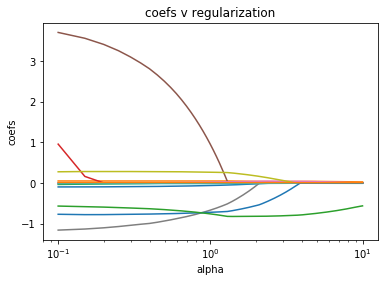

In [10]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.title('coefs v regularization')
print('hello')

### Using Cross Validation

In [11]:
lasso_cv = LassoCV(alphas = alphas, cv = 3, random_state=17)

In [12]:
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17

In [16]:
lasso_cv.coef_

array([-0.09739888,  0.04946381, -0.02749478,  0.16060406, -0.        ,
        3.55971374, -0.00726968, -1.13393157,  0.28096773, -0.01503453,
       -0.77985441,  0.01025033, -0.58259584])

In [14]:
lasso_cv.alpha_

0.14974874371859298

> This is the top alpha for mean squared error on regularization.

### Metrics are typically maximized

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv = 3,
               scoring = 'neg_mean_squared_error')

array([-16.89312641, -37.56646167, -72.42092752])

In [39]:
abs(cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv = 3,
               scoring = 'neg_mean_squared_error').mean())

42.293505199150765

In [40]:
abs(cross_val_score(Lasso(10), X, y, cv = 3,
               scoring = 'neg_mean_squared_error').mean())

53.75150995223132

### Ridge Regression

In [18]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [19]:
ridge_cv = RidgeCV(alphas = ridge_alphas, scoring = 'neg_mean_squared_error')

In [20]:
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        scoring='neg_mean_squared_error')

In [25]:
ridge_cv.coef_

array([-1.07806744e-01,  4.64777319e-02,  1.88249946e-02,  2.68049276e+00,
       -1.73553296e+01,  3.81308752e+00,  3.26382358e-04, -1.46950686e+00,
        3.05084203e-01, -1.23672016e-02, -9.48186753e-01,  9.33313214e-03,
       -5.25214225e-01])

In [24]:
ridge_cv.alpha_

0.03654383070957257

If want to choose features with the model, then prefer lasso regression.